In [ ]:
#pip install numpy
#pip install pandas
#pip install re
#pip instal tqdm
#pip install wordcloud
#pip install matplotlib
#pip install nltk
#pip install sklearn
#pip install sys
#pip install nltk
#pip install sentence_transformers

In [2]:

import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
import my_functions as f
import time
import requests
from nltk import tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import urllib.request

ConnectionError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/sentence-transformers/all-MiniLM-L6-v2 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd8247fcca0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [3]:
# read csv data
data= pd.read_csv("../dataset/1-train/Constraint_Train.csv")
data.head(20)

id                                              tweet label
0    1  The CDC currently reports 99031 deaths. In gen...  real
1    2  States reported 1121 deaths a small rise from ...  real
2    3  Politically Correct Woman (Almost) Uses Pandem...  fake
3    4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4    5  Populous states can generate large case counts...  real
5    6  Covid Act Now found "on average each person in...  real
6    7  If you tested positive for #COVID19 and have n...  real
7    8  Obama Calls Trump’s Coronavirus Response A Cha...  fake
8    9  ???Clearly, the Obama administration did not l...  fake
9   10  Retraction—Hydroxychloroquine or chloroquine w...  fake
10  11  Take simple daily precautions to help prevent ...  real
11  12  The NBA is poised to restart this month. In Ma...  fake
12  13  We just announced that the first participants ...  real
13  14  #CoronaVirusUpdates #IndiaFightsCorona More th...  real
14  15  Protect yourself and others from #COVID19 when...  real
15  16  As of 18 August 2020 8AM till now there have b...  real
16  17  Because of Donald Trump's negligence and incom...  fake
17  18  #IndiaFightsCorona India continues to scale ne...  real
18  19  We just announced that we have shipped vials o...  real
19  20  Multiple Facebook posts claim that “Aussies wi...  fake

In [7]:
# read csv data
data= pd.read_csv("../dataset/1-train/Constraint_Train.csv")
data.head(20)

id                                              tweet label
0    1  The CDC currently reports 99031 deaths. In gen...  real
1    2  States reported 1121 deaths a small rise from ...  real
2    3  Politically Correct Woman (Almost) Uses Pandem...  fake
3    4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4    5  Populous states can generate large case counts...  real
5    6  Covid Act Now found "on average each person in...  real
6    7  If you tested positive for #COVID19 and have n...  real
7    8  Obama Calls Trump’s Coronavirus Response A Cha...  fake
8    9  ???Clearly, the Obama administration did not l...  fake
9   10  Retraction—Hydroxychloroquine or chloroquine w...  fake
10  11  Take simple daily precautions to help prevent ...  real
11  12  The NBA is poised to restart this month. In Ma...  fake
12  13  We just announced that the first participants ...  real
13  14  #CoronaVirusUpdates #IndiaFightsCorona More th...  real
14  15  Protect yourself and others from #COVID19 when...  real
15  16  As of 18 August 2020 8AM till now there have b...  real
16  17  Because of Donald Trump's negligence and incom...  fake
17  18  #IndiaFightsCorona India continues to scale ne...  real
18  19  We just announced that we have shipped vials o...  real
19  20  Multiple Facebook posts claim that “Aussies wi...  fake

In [4]:
for i in range(10):
    print(data.tweet[i])
    print(data.label[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
real
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
fake
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
real
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID K

In [6]:
# convert dataframe(pandas) to array (numpy)
np_data=data.to_numpy()

In [7]:
#split data to real and fake
real_array = []
fake_array=[]

for item in np_data:
    if(item[2]=='real'):
        real_array.append(item)
    if(item[2]=='fake'):
        fake_array.append(item)

In [8]:
# return data from array (numpy) to dataframe(pandas)
real_dataframe=pd.DataFrame(real_array,columns=['id','tweet','label'])
real_dataframe

id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
1        2  States reported 1121 deaths a small rise from ...  real
2        4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
3        5  Populous states can generate large case counts...  real
4        6  Covid Act Now found "on average each person in...  real
...    ...                                                ...   ...
3355  6405  “Sometimes it’s not a lack of resources that m...  real
3356  6406  The cloth face coverings recommended to slow s...  real
3357  6412  The latest updates from the Ministry of Health...  real
3358  6415  Data from #COVIDNET show that after a period o...  real
3359  6420  It has been 93 days since the last case of COV...  real

[3360 rows x 3 columns]

In [9]:
fake_dataframe=pd.DataFrame(fake_array,columns=['id','tweet','label'])
fake_dataframe

id                                              tweet label
0        3  Politically Correct Woman (Almost) Uses Pandem...  fake
1        8  Obama Calls Trump’s Coronavirus Response A Cha...  fake
2        9  ???Clearly, the Obama administration did not l...  fake
3       10  Retraction—Hydroxychloroquine or chloroquine w...  fake
4       12  The NBA is poised to restart this month. In Ma...  fake
...    ...                                                ...   ...
3055  6414  States like New York Illinois and California h...  fake
3056  6416  A tiger tested positive for COVID-19 please st...  fake
3057  6417  ???Autopsies prove that COVID-19 is??� a blood...  fake
3058  6418  _A post claims a COVID-19 vaccine has already ...  fake
3059  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake

[3060 rows x 3 columns]

#### removing some parts in dataset

In [8]:
for x in tqdm(range(len(real_dataframe))):
    real_dataframe.tweet[x]=f.remove_useless_tokens(real_dataframe.tweet[x])

  0%|          | 0/3360 [00:00<?, ?it/s]/tmp/ipykernel_550578/807401719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dataframe.tweet[x]=f.remove_useless_tokens(real_dataframe.tweet[x])
100%|██████████| 3360/3360 [00:01<00:00, 2348.81it/s]


In [19]:
for i in range(len(real_dataframe)):
    print(real_dataframe.tweet[i])
    print("----------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. 
---------------------------------
: We have 1524 testing laboratories in India and as on 25th August 2020 36827520 tests have been done : DG 
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. 
---------------------------------
Covid Act Now found "on average each person in Illinois with COVID-19 is infecting 1.11 other people. Data shows that the infection growth rate has declined over time this factors in the stay-at-home order and other restrictions put in place." 
----

In [11]:
for x in tqdm(range(len(fake_dataframe))):
    fake_dataframe.tweet[x]=f.remove_useless_tokens(fake_dataframe.tweet[x])

  0%|          | 0/3060 [00:00<?, ?it/s]/tmp/ipykernel_326143/378730375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_dataframe.tweet[x]=remove_useless_tokens(fake_dataframe.tweet[x])
100%|██████████| 3060/3060 [00:01<00:00, 2824.34it/s]


In [20]:
for i in range(len(fake_dataframe)):
    print(fake_dataframe.tweet[i])
    print("---------------------------------")

Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag 
---------------------------------
Obama Calls Trump’s Coronavirus Response A Chaotic Disaster 
---------------------------------
 Clearly, the Obama administration did not leave any kind of game plan for something like this. 
---------------------------------
Retraction—Hydroxychloroquine or chloroquine with or without a macrolide for treatment of COVID-19: a multinational registry analysis - The Lancet 
---------------------------------
The NBA is poised to restart this month. In March we reported on how the Utah Jazz got 58 coronavirus tests in a matter of hours at a time when U.S. testing was sluggish. 
---------------------------------
Because of Donald Trump's negligence and incompetence: - More than 110,000 people have died - We have nearly 2 million cases of COVID-19 - Over 20 million Americans are out of work And yet he’s patting himself on the back. Unbelievable.
------------------------------

In [11]:
# # to save data 
# real_dataframe.to_csv('../dataset/1-train/real_dataframe.csv')
# fake_dataframe.to_csv('../dataset/1-train/fake_dataframe.csv')

#### Testing in removing

In [12]:
for i in range(len(data)):
    print(data.tweet[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC

In [49]:
from urlextract import URLExtract

def convert_short_url_to_long_url_in_line(dataset):
    find_count=0
    nfind_count=0
    for line in dataset["tweet"]:
        extractor = URLExtract()
        urls = extractor.find_urls(line)
        print(urls)
        print("--------")
        for url in urls:
            # url = re.sub("[.$]","",url)
            print(url)
            if url:
                
                if url[-1]=='.':
                    print("dot")
                    url=url[:-1]
                    print(url)
#                 # l_url=f.url_short_to_long(url)

#                 l_url = requests.get(str(url), headers=headers)
                try:
                    l_url = urllib.request.urlopen(url)
                    print(l_url.url)
                    print("find")
                    find_count +=1
                    
                except:
                    print("not found")
                    nfind_count +=1
                    
                    continue
                
                # line.replace(url,l_url)
            
            
            
            
            
        print("#########")
        
    print(find_count)
    print(nfind_count)
        
                

In [9]:
url1="https://t.co/DeDqZEhAsB"
print(url1)
r=requests.get(url1)
r.status_code

https://t.co/DeDqZEhAsB


200

In [50]:
convert_short_url_to_long_url_in_line(data[0:10])

[]
--------
#########
['https://t.co/YASGRTT4ux']
--------
https://t.co/YASGRTT4ux
https://twitter.com/COVID19Tracking/status/1288242179756847105/photo/1
find
#########
['https://t.co/thF8GuNFPe']
--------
https://t.co/thF8GuNFPe
https://www.thespoof.com/spoof-news/us/148337/politically-correct-woman-almost-uses-pandemic-as-excuse-not-to-reuse-plastic-bag
find
#########
['https://t.co/Yh3ZxknnhZ']
--------
https://t.co/Yh3ZxknnhZ
https://twitter.com/COVIDNewsByMIB/status/1298220752190070786/photo/1
find
#########
['https://t.co/1pYW6cWRaS']
--------
https://t.co/1pYW6cWRaS
https://twitter.com/COVID19Tracking/status/1285336619449380864/photo/1
find
#########
['https://t.co/hhigDd24fE']
--------
https://t.co/hhigDd24fE
https://www.wandtv.com/news/real-time-model-shows-infection-growth-rate-slowly-declining/article_cfe5b2e6-8dfa-11ea-9315-dff52574ac73.html
find
#########
['https://t.co/z5kkXpqkYb.', 'https://t.co/9PaMy0Rxaf']
--------
https://t.co/z5kkXpqkYb.
dot
https://t.co/z5kkXpqkYb
n

## Word cloud and some visualization

100%|██████████| 3360/3360 [00:00<00:00, 77803.08it/s]


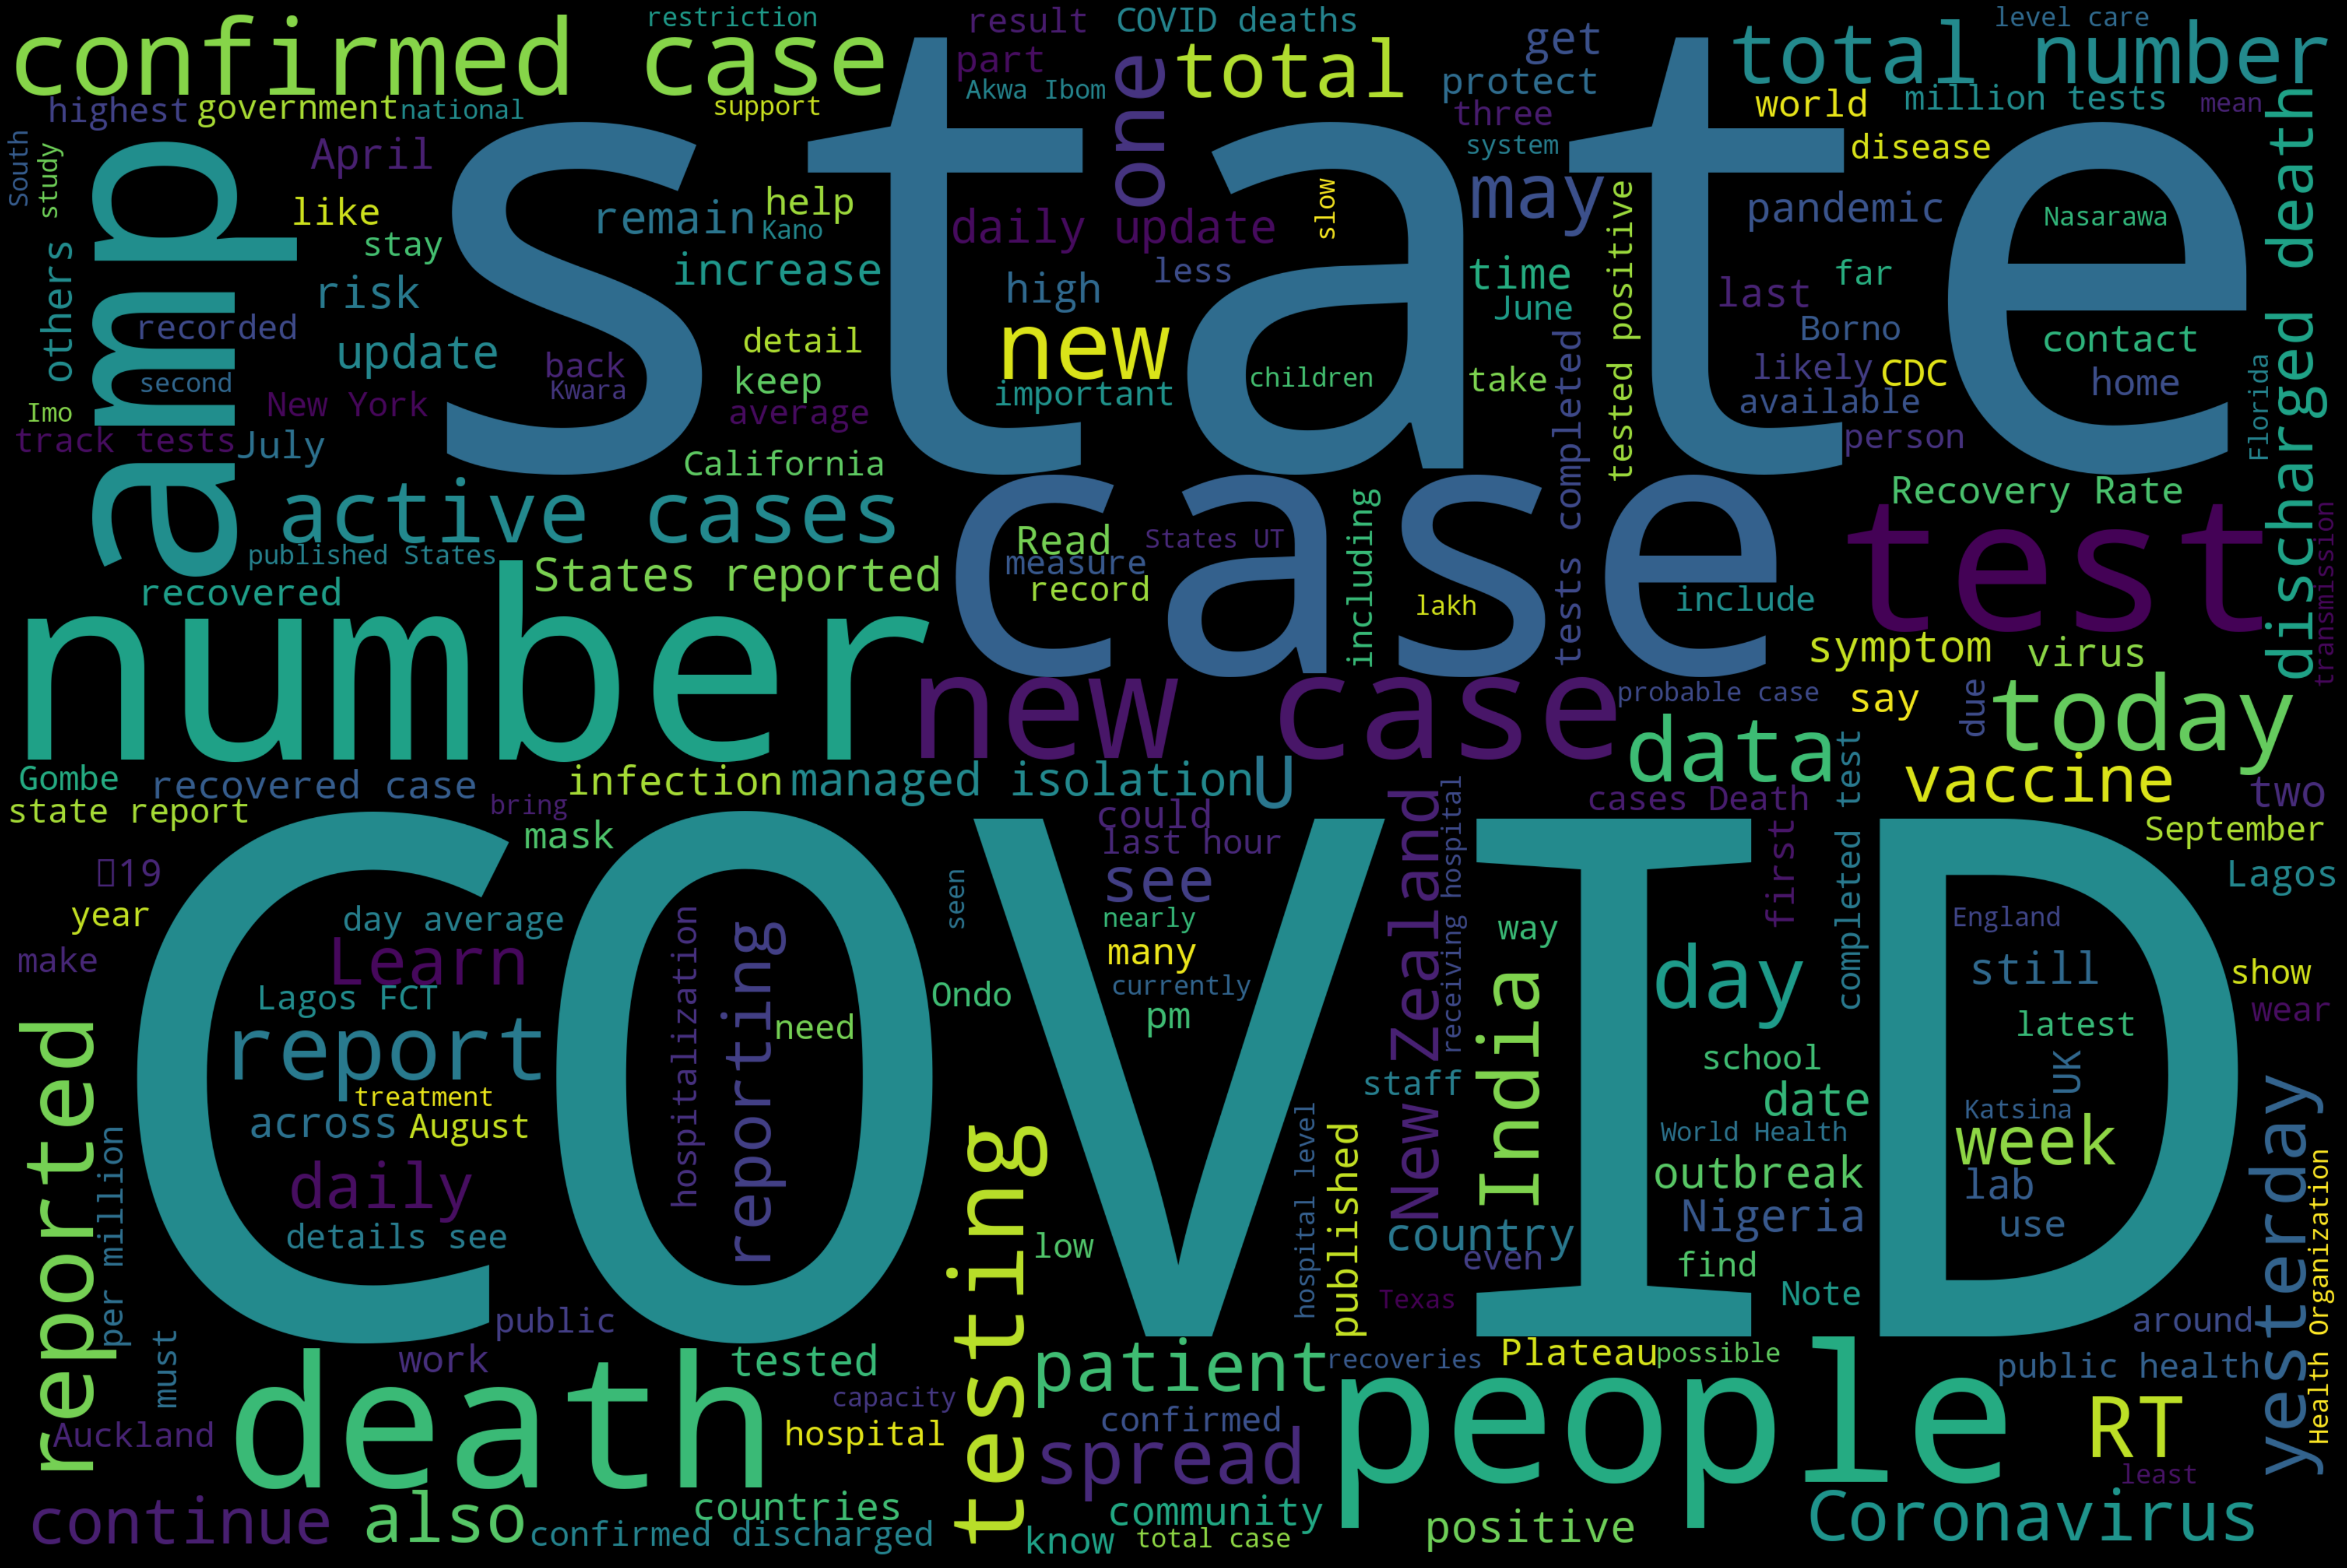

In [13]:
#Word Cloud real_dataframe
text = ''
for news in tqdm(range(len(real_dataframe))):
    
    text += f" {real_dataframe.tweet[news]}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

100%|██████████| 3060/3060 [00:00<00:00, 94124.76it/s]


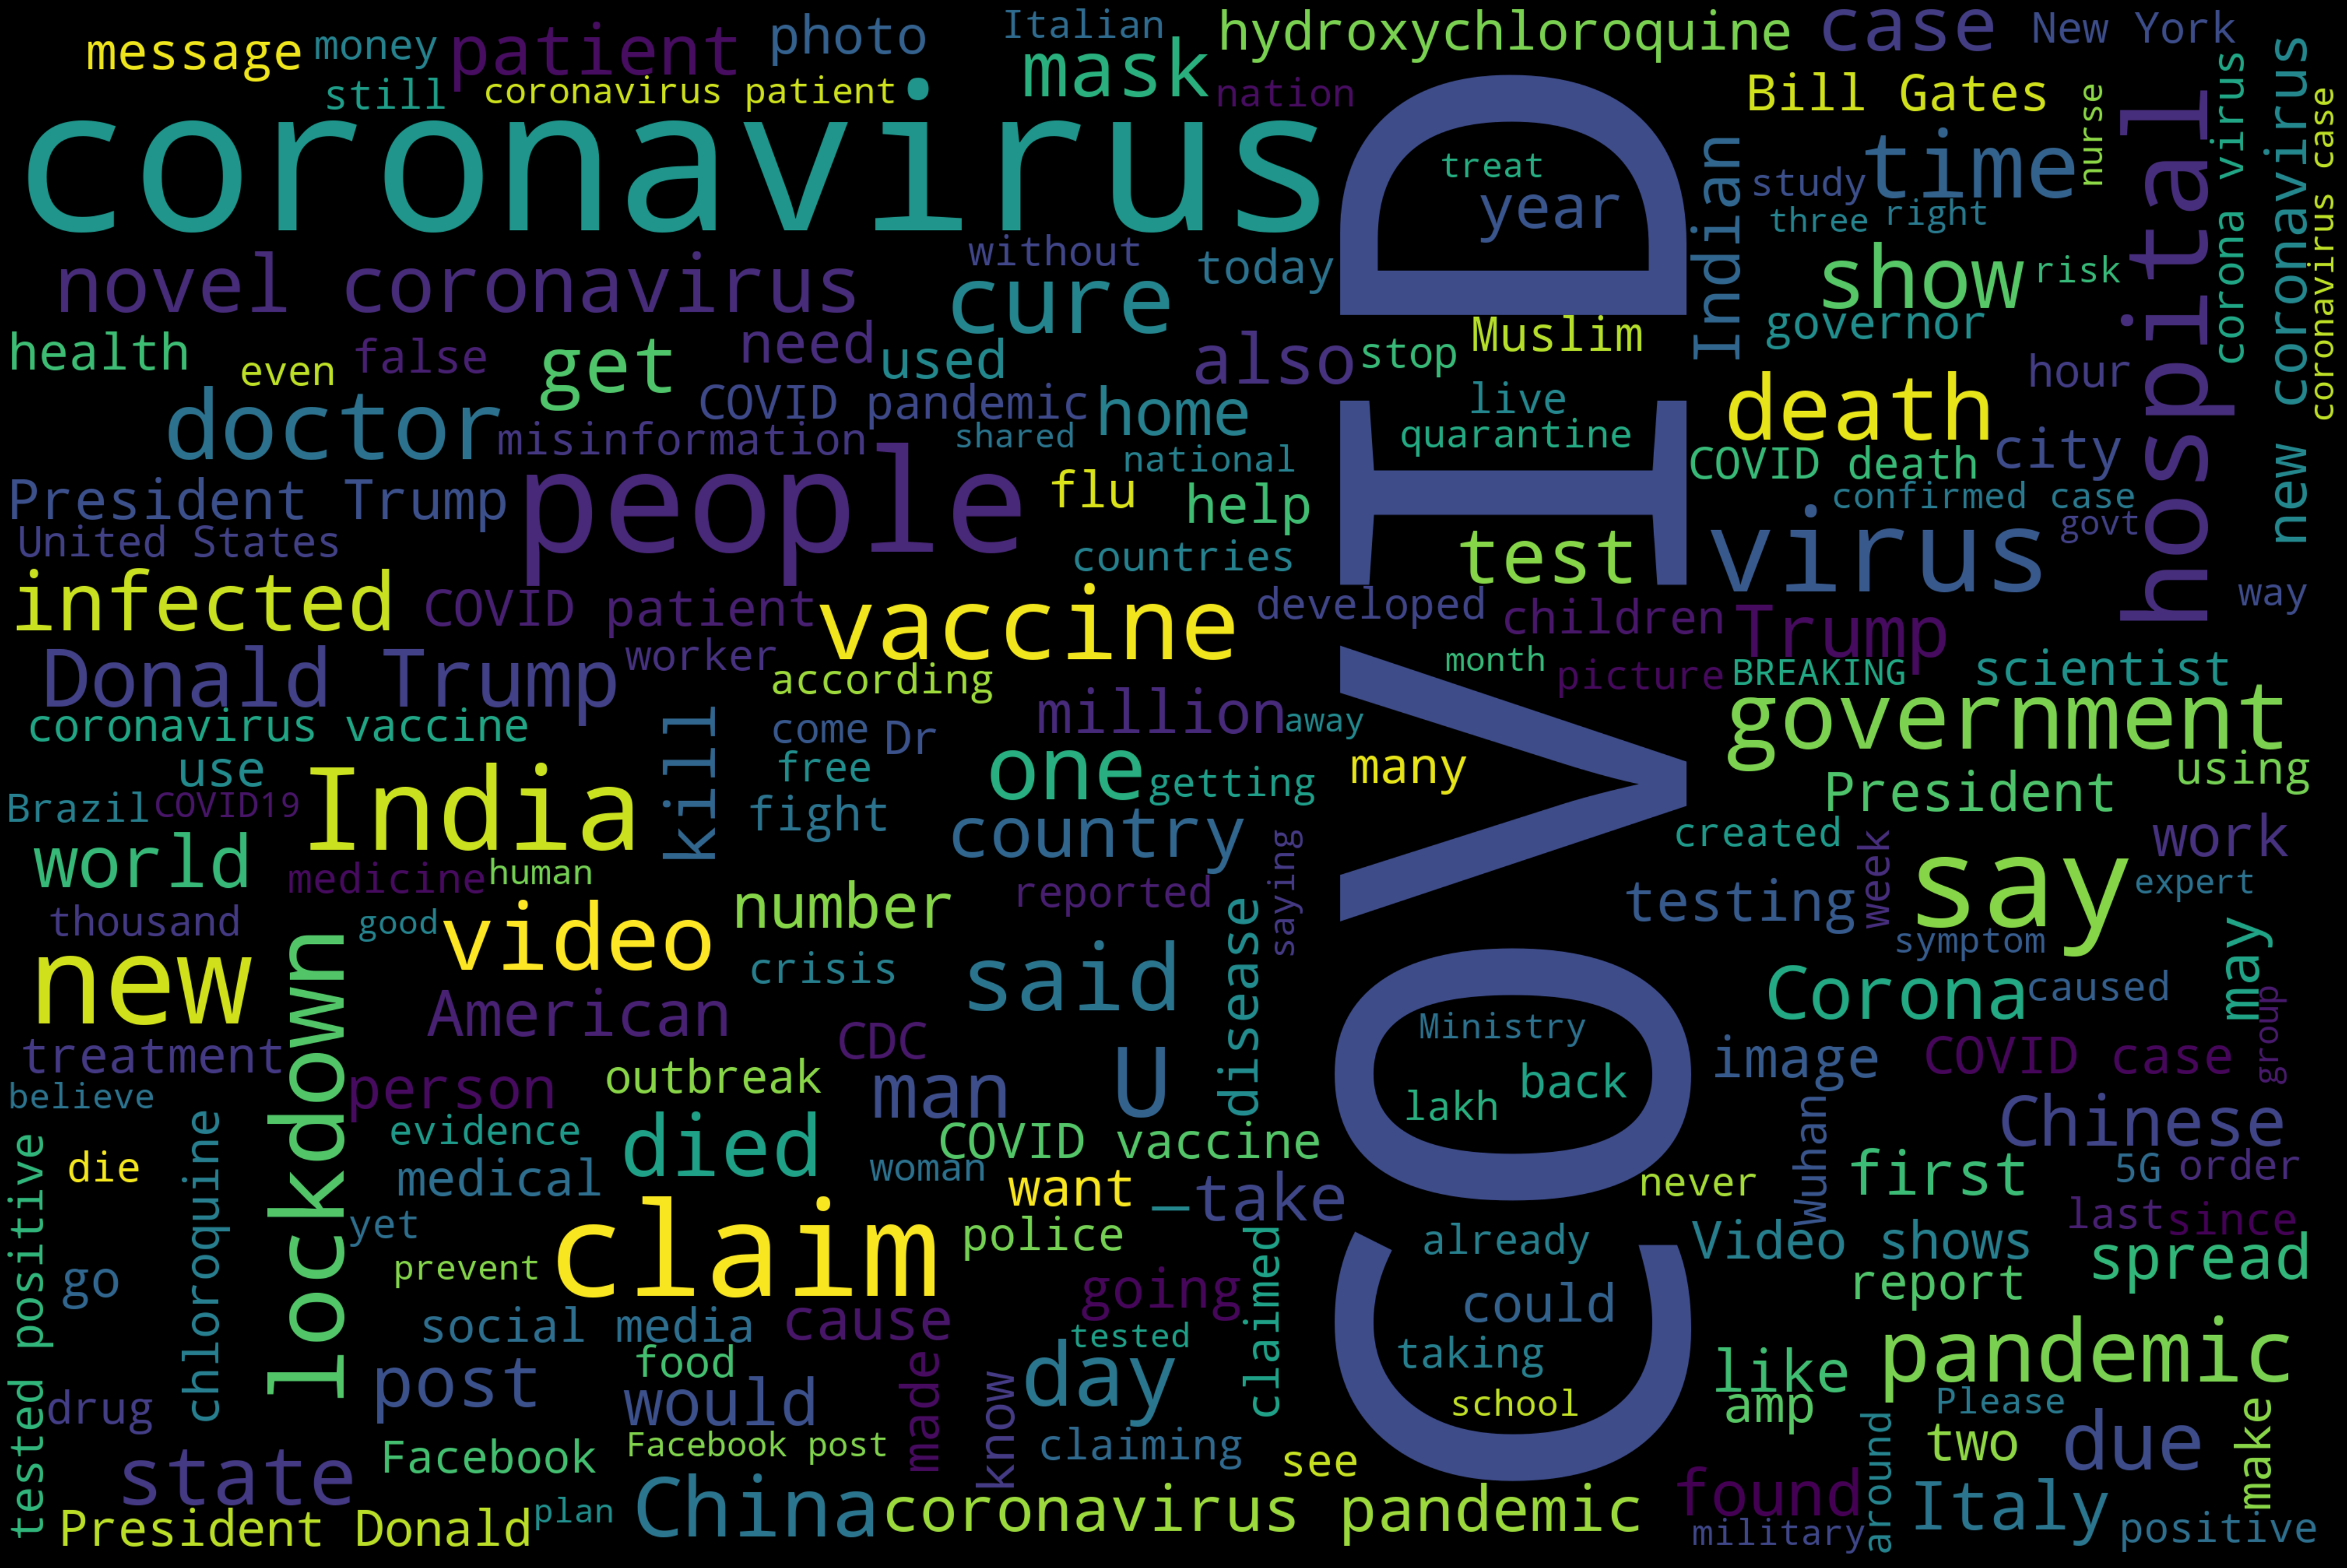

In [14]:
#Word Cloud fake_dataframe
text = ''
for news in tqdm(range(len(fake_dataframe))):
    
    text += f" {fake_dataframe.tweet[news]}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

## TF-IDF preprocessing work

In [15]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(real_dataframe.tweet)
feature_names = vectorizer.get_feature_names()
feature_names

/home/amr/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '00pm',
 '01',
 '011',
 '0141',
 '02',
 '03',
 '033',
 '04',
 '0408',
 '041461636',
 '047738491',
 '05',
 '05am',
 '06',
 '062454254',
 '063661060',
 '0651',
 '07',
 '0710',
 '08',
 '0800',
 '0818',
 '0881911',
 '09',
 '093020408',
 '0940',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10001',
 '1000th',
 '1002',
 '1003299',
 '1006615',
 '1008',
 '1009976',
 '100k',
 '101',
 '1010',
 '1010824',
 '1011',
 '1013',
 '1013964',
 '1014',
 '10162',
 '1017754',
 '101951',
 '102',
 '1023',
 '10238',
 '1027',
 '103',
 '1031',
 '10315',
 '1037',
 '10382',
 '103945',
 '10436',
 '10456',
 '1046470',
 '10487',
 '10492',
 '105',
 '1051',
 '1054',
 '1055027',
 '105599',
 '10578',
 '1059346',
 '106',
 '1061',
 '1067',
 '107',
 '1070',
 '1072845',
 '1073',
 '1074',
 '1076',
 '1078',
 '108',
 '10801',
 '1083',
 '1089',
 '109',
 '1090',
 '109071',
 '1091',
 '10946',
 '1095',
 '1098621',
 '10am',
 '10k',
 '10pm',
 '10s',
 '10th',
 '10x',
 '11',
 '1100',
 '11000',
 '110000',
 '11069',
 '1107',
 '1

In [16]:
len(feature_names)

7751

In [17]:
dense = vectors.todense()
denselist = dense.tolist()
tfidf_df = pd.DataFrame(denselist, columns=feature_names)


In [18]:
tfidf_df.head(10)

00  00pm   01  011  0141   02   03  033   04  0408  ...  zealand  \
0  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
1  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
2  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
3  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
4  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
5  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
6  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
7  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
8  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   
9  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   

   zealanders  zika  zone  zones  zoom  zooming  zydus  īmarimamiriona  ー19  
0         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
1         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
2         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
3         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
4         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
5         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
6         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
7         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
8         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  
9         0.0   0.0   0.0    0.0   0.0      0.0    0.0             0.0  0.0  

[10 rows x 7751 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(tfidf_df,data.label,test_size=0.33)
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
prediction=model.predict(x_test)
# using score to get accuracy of model
score=model.score(x_test,y_test)
print(score)

In [ ]:
# visualize the predictions using metrics classification report
print(metrics.classification_report(y_test, prediction))

In [2]:
data= pd.read_csv("../dataset/1-train/")
print(f.hashtag_list(data))


['#ObamaGate', '#pornography', '#nails', '#hydroxychloroquine', '#footballamerican', '#PositiveVibes', '#healthcare', '#greatwallofchina', '#2020presidentialelection', '#Lucknow', '#shopping', '#DatosCoronaVirus', '#coronavacccine', '#COVID19Pandemic', '#Mizoram', '#fbi', '#keithholdskeytovirusvaccine', '#Hantavirus', '#QuarantineCentres', '#CoronaVirusUpdate', '#NewYork', '#covidlockdown', '#uvdisinfection', '#summer', '#COV', '#nba', '#god', '#prophylactics', '#coronavirusupdate', '#talent', '#Balasore', '#strategicreserve', '#Work', '#FutureTrends', '#chloroquine', '#duckdynasty', '#beer', '#JusticforTarun', '#NotMyPresident', '#death', '#sickness', '#hoarding', '#bicester', '#PCRTest', '#Manafort', '#Carona', '#RNC2020', '#republicans', '#Handwashing', '#Jarkhand', '#panties', '#Cancel_CA_CS_exams', '#spain', '#WorkFromHome', '#Vadodara', '#MentalHealth', '#covaxine', '#SocialDistancing', '#germs', '#mask', '#MODIJI_POSTPONEJEENEET', '#zoodirector', '#seanhannity', '#HomeQuarantine